<a href="https://colab.research.google.com/github/shaila-kumari/servoprediction/blob/main/servoprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITLE OF THE PTOJECT
<BR>
SERVO PREDICTION USING LINEAR REGRESSION
<BR>



What is servo?
<br>
In control engineering, a servo, or servomechanism, is a system that uses feedback to precisely control the position, velocity, or torque of a mechanical system. Servos are used in many applications, including robotics, medical devices, and renewable energy systems.
In mechanical and control engineering, a servomechanism (also called servo system, or simply servo) is a control system for the position and its time derivatives, such as velocity, of a mechanical system. It often includes a servomotor, and uses closed-loop control to reduce steady-state error and improve dynamic response.[1] In closed-loop control, error-sensing negative feedback is used to correct the action of the mechanism.[2] In displacement-controlled applications, it usually includes a built-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect.[3] Following a specified motion trajectory is called servoing,[4] where "servo" is used as a verb. The servo prefix originates from the Latin word servus meaning slave.[1]

The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position, speed, attitude or any other measurable variables.[5] For example, an automotive power window control is not a servomechanism, as there is no automatic feedback that controls position—the operator does this by observation. By contrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.
<br>

In [ ]:
#import library
import pandas as pd
import numpy as np

In [ ]:
#import csv as dataframe
servoprediction=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/refs/heads/main/Servo%20Mechanism.csv')

In [ ]:
#getting first five rows of dataframe
servoprediction.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [ ]:
servoprediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [ ]:
servoprediction.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [ ]:
servoprediction.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [ ]:
servoprediction.shape

(167, 5)

In [ ]:
servoprediction[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [ ]:
servoprediction[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


In [ ]:
#get encoding of categorical features
servoprediction.replace ({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)
servoprediction.replace ({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


In [ ]:
#define y and x
y =servoprediction[ 'Class']

In [ ]:
y.shape

(167,)

In [ ]:
y

,Class
0,4
1,11
2,6
3,48
4,6
...,...
162,44
163,40
164,25
165,44


In [ ]:
x =servoprediction[['Motor','Screw','Pgain','Vgain']]

In [ ]:
x.shape

(167, 4)

In [ ]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [ ]:
#get train test split
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [ ]:
#get model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#get model prediction
y_pred= lr.predict(x_test)

In [ ]:
y_pred.shape

(51,)

In [ ]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

In [ ]:
#get model evaluation
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [ ]:
mean_absolute_error (y_test,y_pred)

7.190539677251235

In [ ]:
r2_score(y_test,y_pred)

0.6807245170563927

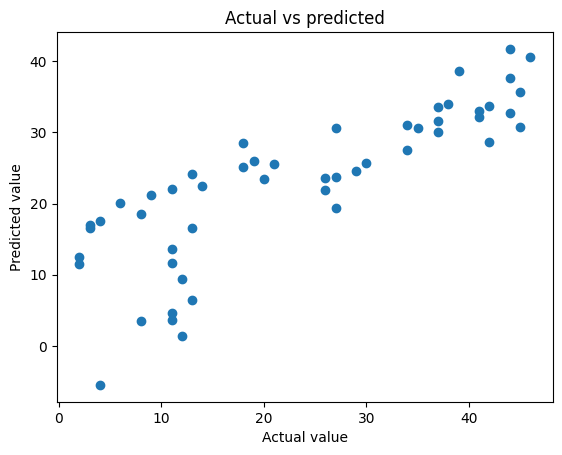

In [ ]:
#get visualization of actual vs predicted result
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs predicted')
plt.show()

In [ ]:
#get future prediction
x_new = servoprediction.sample(1)

In [ ]:
x_new

,Motor,Screw,Pgain,Vgain,Class
116,0,2,4,3,26


In [ ]:
x_new.shape

(1, 5)

In [ ]:
x_new = x_new.drop('Class', axis=1, errors='ignore')

In [ ]:
x_new

,Motor,Screw,Pgain,Vgain
116,0,2,4,3


In [ ]:
x_new.shape

(1, 4)

In [ ]:
y_pred_new =lr.predict(x_new)

In [ ]:
y_pred_new

array([28.7034369])